In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Advertising.csv")
df.head()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

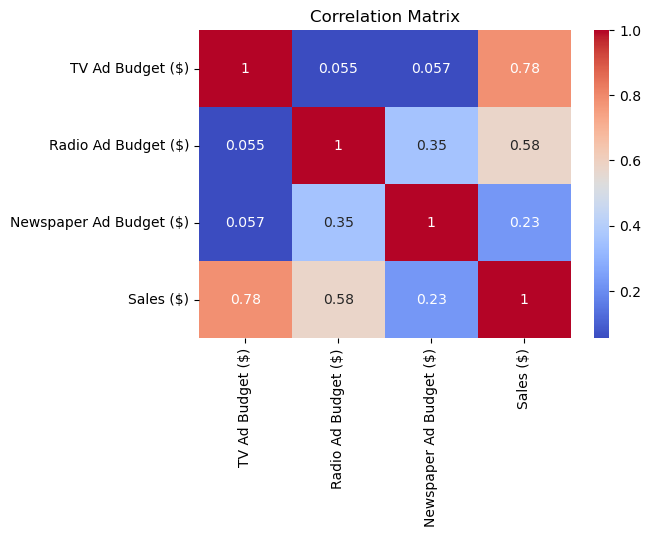

In [5]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
X = df[['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)']]
y = df['Sales ($)']



In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.4607567168117597
MSE: 3.1740973539761015
RMSE: 1.7815996615334495
R2 Score: 0.8994380241009121


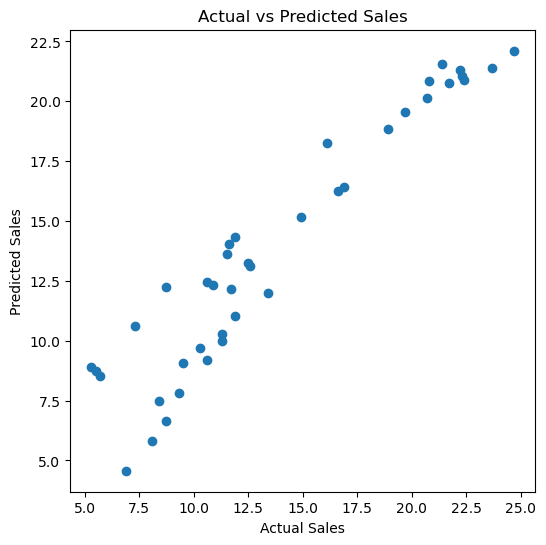

In [12]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


In [13]:
new_data = [[150, 25, 10]]  # Example ad spend
predicted_sales = model.predict(new_data)

print("Predicted Sales:", predicted_sales[0])


Predicted Sales: 14.445982457703163


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
